# Importing Resources 


In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
%matplotlib inline

The CIFAR10 has 50,000 32x32 color training images and <b>10,000 test images by default, labeled over 10 categories</b>. The training dataset is further split into 80-20 ratio to get <b>10,000 images in training set. The 10,000 images in testing set is used for validation</b>. The 10 classes of data is as follows: ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Loading Dataset

In [3]:
(trainX, trainy), (validateX1, validatey1) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Preprocessing


##  Splitting Dataset into Train - Validate - Test

In [4]:
# Splitting the training dataset to create new training and validation set
trainX1,testX,trainy1,testy = train_test_split(trainX,trainy,test_size = 0.8,random_state = 100)

In [5]:
print('There are {:,} images in the Training set'.format(trainX1.shape[0]))
print('There are {:,} images in the Validation set'.format(validateX1.shape[0]))
print('There are {:,} images in the test set'.format(testX.shape[0]))

There are 10,000 images in the Training set
There are 10,000 images in the Validation set
There are 40,000 images in the test set


## Normalization and Creating Batch

In [6]:
print("The shape of training dataset is: ", trainX1.shape)
print("The shape of validation dataset is: ", validateX1.shape)
# normalizing the values. The default range is 0-255. Thus on min-max normalization, the range would be 0-1
trainX1 = trainX1.astype('float32')/255
validateX1 = validateX1.astype('float32')/255
testX = testX.astype('float32')/255


The shape of training dataset is:  (10000, 32, 32, 3)
The shape of validation dataset is:  (10000, 32, 32, 3)


In [7]:

# Creating batches of dataset.To do so, we have to convert the variable of type 'nparray'
# to type 'tensor', which is done by using the command tf.data.Dataset.from_tensor_slices
training_batch = tf.data.Dataset.from_tensor_slices((trainX1,trainy1)).batch(32)
test_batch = tf.data.Dataset.from_tensor_slices((testX,testy))
validation_batch = tf.data.Dataset.from_tensor_slices((validateX1,validatey1))

## Multi Layer Perceptron

The multilayer perceptron is having 2 hidden layers, with each hidden layer having 512 nodes. Since there are 10 classes of data, the number of output nodes are 10. Each image is having 32 x 32 pixels with 3 colour layers (RGB). There there are
32x32x3 = 3072 features per image. keras.sequential is used for sequential flow in the MLP. The flatten layer is used to reshape the input image. The dense layer is the hidden layer( inputs are no of nodes and activation function)

In [8]:
tf.keras.backend.clear_session()
mlp = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


We are using sigmoid activation function for the hidden layers, as described in the question. The output layer is using softmax activation function since predicts the probability that the input belongs to a particular category. The output node with the highest probability value categorises the input. The weights and bias are automatically initialised


In [9]:
# Using adam optimiser for weight training
mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
Epoch = 5
history_mlp = mlp.fit(training_batch,epochs=Epoch)

Epoch 1/5
313/313 [==============================] - 3s 7ms/step - loss: 2.0562 - accuracy: 0.2394
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8988 - accuracy: 0.3031
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8341 - accuracy: 0.3308
Epoch 4/5
313/313 [==============================] - 2s 7ms/step - loss: 1.7847 - accuracy: 0.3530
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.7481 - accuracy: 0.3639


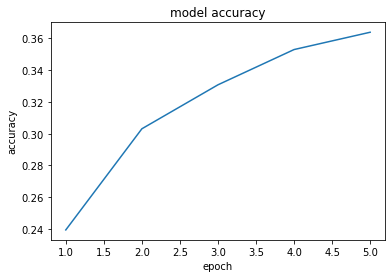

In [11]:
plt.plot([1,2,3,4,5],history_mlp.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [12]:
loss,accuracy = mlp.evaluate(validateX1,validatey1)

313/313 [==============================] - 1s 2ms/step - loss: 1.8417 - accuracy: 0.3378


In [13]:
print("The accuray of the MLP on validation set is:",accuracy)

The accuray of the MLP on validation set is: 0.337799996137619


In [14]:
loss_mlp_test,acc_mlp_test =mlp.evaluate(testX,testy) 

1250/1250 [==============================] - 3s 3ms/step - loss: 1.8506 - accuracy: 0.3363


## Changing Hidden Layers and Nodes

### Changing Hidden Layers


In [15]:
tf.keras.backend.clear_session()
accuracy_layers = []
# 1 hidden Layer
model_layer4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------1 Hidden Layer ----------------------")
model_layer4.fit(training_batch, epochs=5)
loss,acc = model_layer4.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
#2 hidden Layer
accuracy_layers.append(accuracy)
# 3 hidden Layer
model_layer3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------3 Hidden Layer ----------------------")
model_layer3.fit(training_batch, epochs=5)
loss,acc = model_layer3.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
# 5 hidden Layers
model_layer1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------5 Hidden Layer ----------------------")
model_layer1.fit(training_batch, epochs=5)
loss,acc = model_layer1.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)
# 10 hidden layers
model_layer2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(512,activation = 'sigmoid'),
                                tf.keras.layers.Dense(512,activation = 'sigmoid'),tf.keras.layers.Dense(10,activation = 'softmax')])
model_layer2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("---------------10 Hidden Layer ----------------------")
model_layer2.fit(training_batch, epochs=5)
loss,acc = model_layer2.evaluate(validateX1,validatey1)
accuracy_layers.append(acc)


---------------1 Hidden Layer ----------------------
Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.0791 - accuracy: 0.2495
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8701 - accuracy: 0.3242
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8022 - accuracy: 0.3509
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 1.7544 - accuracy: 0.3691
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.7412 - accuracy: 0.3817
---------------3 Hidden Layer ----------------------
Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 2.1081 - accuracy: 0.2051
Epoch 2/5
313/313 [==============================] - 3s 9ms/step - loss: 1.9431 - accuracy: 0.2806
Epoch 3/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8734 - accuracy: 0.3079
Epoch 4/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8243 - accuracy: 0.3299
Epo

In [16]:
accuracy_layers

[0.3817000091075897,
 0.337799996137619,
 0.3384000062942505,
 0.17569999396800995,
 0.10000000149011612]

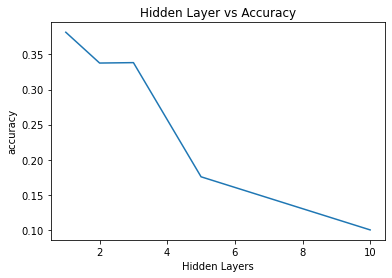

In [17]:
plt.plot([1,2,3,5,10],accuracy_layers)
plt.title('Hidden Layer vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layers')
plt.show()

#### Thus as the number of hidden layer increases, the accuracy of the model decreases

### Changing Nodes 

The number of hidden layers are kept at 2 since these values provides the highest accuracy for a given number of nodes

In [18]:
tf.keras.backend.clear_session()
accuracy_nodes = []
# 128 nodes 
print("------------------------- 128 nodes -----------------------------------")
model_nodes1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(128,activation = 'sigmoid'),
                                tf.keras.layers.Dense(128,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes1.fit(training_batch, epochs = 5)
loss,acc = model_nodes1.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 256 nodes 
print("------------------------- 256 nodes -----------------------------------")
model_nodes2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(256,activation = 'sigmoid'),
                                tf.keras.layers.Dense(256,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes2.fit(training_batch, epochs = 5)
loss,acc = model_nodes2.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 512 nodes
accuracy_nodes.append(accuracy)
# 1024 nodes 
print("------------------------- 1024 nodes -----------------------------------")
model_nodes3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(1024,activation = 'sigmoid'),
                                tf.keras.layers.Dense(1024,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes3.fit(training_batch, epochs = 5)
loss,acc = model_nodes3.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)
# 2048 nodes 
print("------------------------- 2048 nodes -----------------------------------")
model_nodes4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (32,32,3)),
                                tf.keras.layers.Dense(2048,activation = 'sigmoid'),
                                tf.keras.layers.Dense(2048,activation = 'sigmoid'),
                                tf.keras.layers.Dense(10,activation = 'softmax')])
model_nodes4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_nodes4.fit(training_batch, epochs = 5)
loss,acc = model_nodes4.evaluate(validateX1,validatey1)
accuracy_nodes.append(acc)



------------------------- 128 nodes -----------------------------------
Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 2.0915 - accuracy: 0.2267
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 1.9250 - accuracy: 0.3014
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8646 - accuracy: 0.3250
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8133 - accuracy: 0.3466
Epoch 5/5
313/313 [==============================] - 0s 723us/step - loss: 1.8092 - accuracy: 0.3386
------------------------- 256 nodes -----------------------------------
Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 2.0690 - accuracy: 0.2299
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9105 - accuracy: 0.2962
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8449 - accuracy: 0.3275
Epoch 4/5
313/313 [==============================] - 1s 4ms/st

In [19]:
accuracy_nodes

[0.3386000096797943,
 0.35010001063346863,
 0.337799996137619,
 0.34630000591278076,
 0.32749998569488525]

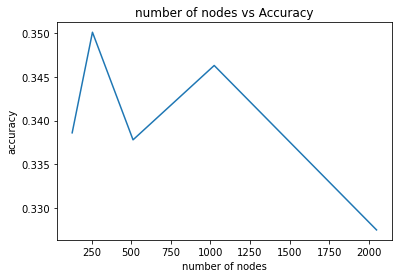

In [20]:
plt.plot([128,256,512,1024,2048],accuracy_nodes)
plt.title('number of nodes vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of nodes')
plt.show()

### The maximum accuracy is achieved when nodes are 256 and hidden layers 2

# CNN 1

In [21]:
tf.keras.backend.clear_session()
cnn1 = tf.keras.Sequential([ tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                              tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation = 'sigmoid'),
                             tf.keras.layers.Dense(512,activation = 'sigmoid'),
                             tf.keras.layers.Dense(10,activation = 'softmax')])
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
____________________________________________

In [22]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history1 = cnn1.fit(trainX1,trainy1,epochs=5)

Epoch 1/5
313/313 [==============================] - 52s 165ms/step - loss: 1.7699 - accuracy: 0.3478
Epoch 2/5
313/313 [==============================] - 51s 163ms/step - loss: 1.3122 - accuracy: 0.5299
Epoch 3/5
313/313 [==============================] - 51s 162ms/step - loss: 0.9679 - accuracy: 0.6621
Epoch 4/5
313/313 [==============================] - 80s 255ms/step - loss: 0.5537 - accuracy: 0.8160
Epoch 5/5
313/313 [==============================] - 91s 291ms/step - loss: 0.2112 - accuracy: 0.9426


In [24]:
loss_cnn1_val,acccuracy_cnn1_val = cnn1.evaluate(validateX1,validatey1)

313/313 [==============================] - 21s 66ms/step - loss: 1.6403 - accuracy: 0.5394


In [25]:
loss_cnn1_test,accuracy_cnn1_test = cnn1.evaluate(testX,testy)

1250/1250 [==============================] - 85s 68ms/step - loss: 1.6251 - accuracy: 0.5497


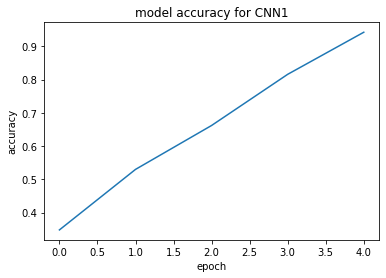

In [26]:
plt.plot(history1.history['accuracy'])
plt.title('model accuracy for CNN1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## CNN2

In [27]:
tf.keras.backend.clear_session()
cnn2 = tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(512,activation = 'sigmoid'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(10,activation = 'softmax')])
                                                             

In [28]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history2 = cnn2.fit(trainX1,trainy1,epochs=5)

Epoch 1/5
313/313 [==============================] - 26s 81ms/step - loss: 1.9751 - accuracy: 0.2627
Epoch 2/5
313/313 [==============================] - 25s 79ms/step - loss: 1.5765 - accuracy: 0.41370s - loss: 1.5763 - accuracy: 0.
Epoch 3/5
313/313 [==============================] - 25s 81ms/step - loss: 1.4226 - accuracy: 0.4730
Epoch 4/5
313/313 [==============================] - 25s 81ms/step - loss: 1.3271 - accuracy: 0.5183
Epoch 5/5
313/313 [==============================] - 24s 77ms/step - loss: 1.2098 - accuracy: 0.5670


In [30]:
loss_cnn2_val,acccuracy_cnn2_val = cnn2.evaluate(validateX1,validatey1)

313/313 [==============================] - 9s 28ms/step - loss: 1.2302 - accuracy: 0.5613


In [31]:
loss_cnn2_test,accuracy_cnn2_test = cnn2.evaluate(testX,testy)

1250/1250 [==============================] - 38s 30ms/step - loss: 1.2387 - accuracy: 0.5581


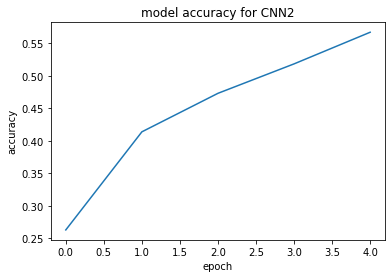

In [32]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy for CNN2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()